<h1>XN Project 2019 Fall</h1>

<h2>Project Description</h2>

In this project, we are going to explore functions to automatically generate analysis report for research trend, which will help onclusive customers maintain a better pubulic relationship and win more market share in the furture.
Our work have mainly divided into following parts:
<ul>
<li><i><b>Assumption</b></i></li>
   Assume our client is apple,Inc, who want to know sentiments on the website about its product airpods. 
<li><i><b>Data Collection</b></i></li>
    Based on the above assumption and our final goals, we collect data about airpods.including sources, date, author,     title, topic and content.
<li><i><b>Exploratory Data Analysis</b></i></li>
    EDA will be done to see how data spread and try fo find insights from raw data.
<li><i><b>Sentiments Analysis</b></i></li>
    Using Natural Language Process to do text mining, from the results of which, we will provides several visuals         about article frequency, authors, publications, competiotrs and co-mentioned terms which indicates features that     customer care about.
<li><i><b>Automatical Reports</b></i></li>
    On top of visuals, there are also corresponding reports to help customer understand those visuals and some           suggestions are provided to do market campaigns.
    
    
    

<h2>Exploratory Data Analysis</h2>

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
os.getcwd()

'/Users/yanting/Downloads/github/yanting1'

In [3]:
raw = pd.read_csv('/Users/yanting/Desktop/XN_FinalDATA_Airpod - Sheet1.csv')

In [4]:
raw.head(10)

,Article_id,Topic,Title,Subtitle,Author,Source,Reviews,Date,URL,Content
0,1,Tech,Airpods are Tragedy,Apple claims that AirPods are building a “wire...,Caroline Haskins,VICE,NaN,2019-05-06,https://www.vice.com/en_us/article/neaz3d/airp...,"In each article of this column, we'll focus on..."
1,2,Tech,Amazon Pursues Apple’s AirPods With Echo Bud W...,NaN,Mark Gurman,Bloomberg,NaN,2019-09-25,https://www.bloomberg.com/news/articles/2019-0...,Amazon.com Inc. revealed its rival to Apple In...
2,3,Tech,The latest Apple AirPods are finally on sale,NaN,Isabelle Kagan,USATODAY,NaN,2019-08-21,https://www.usatoday.com/story/tech/reviewedco...,The latest model of AirPods—the ones that come...
3,4,Tech,"Apple AirPods Review: Perfect Earbuds, but The...","Sleek and convenient, Apple’s wireless earbuds...",Brian Chen,TheNewYorkTimes,NaN,2019-04-03,https://www.nytimes.com/2019/04/03/technology/...,"Apple’s new AirPods, those tiny wireless earbu..."
4,5,Market,Music to Apple’s Ears,Newly updated AirPods amped up non-iPhone busi...,Dan Gallagher,TheWallStreetJournal,NaN,2019-08-01,https://www.wsj.com/articles/music-to-apples-e...,Apple Inc.’s AirPods met with no small amount ...
5,6,Tech,"AirPods, the world’s most popular wireless hea...",NaN,Null,Apple,NaN,2019-03-20,https://www.apple.com/newsroom/2019/03/airpods...,New AirPods Are Powered by the New H1 Chip and...
6,7,Tech,How did Apple’s AirPods go from mockery to mil...,"Back in 2016, Apple’s wireless earbuds were ri...",Elena Cresci,The Guardian,1061.0,2019-02-10,https://www.theguardian.com/technology/shortcu...,"Of all the widely ridiculed tech products, App..."
7,8,Health,The truth behind claims Airpods cause cancer,NaN,Zoë Schlanger,QUARTZ,NaN,2019-03-13,https://qz.com/1572885/the-truth-behind-claims...,A story began circulating on internet news pla...
8,9,Tech,Apple finds wearable ‘gimmicks’ really count a...,As sales of its signature product peak a big c...,Edward Helmore,The Guardian,NaN,2019-05-05,https://www.theguardian.com/technology/2019/ma...,If Apple wants to prove to doubters that there...
9,10,Tech,Everyone’s AirPods will die. We’ve got the tri...,We shouldn’t let Apple turn headphones into ex...,Geoffrey A. Fowler,The Washington Post,1034.0,2019-10-08,https://www.washingtonpost.com/technology/2019...,"“Sorry, we can’t help you,” said the Apple sto..."


In [5]:
len(raw)

65

In [6]:
import seaborn as sns

In [7]:
raw.Source.unique()

array(['VICE', 'Bloomberg', 'USATODAY', 'TheNewYorkTimes',
       'TheWallStreetJournal', 'Apple', 'The Guardian', 'QUARTZ',
       'The Washington Post', 'Forbes', 'Los Angeles Times', 'CNN',
       'MEL Beta', 'COMPLEX', 'VOX', 'SoundGuys', '9to5Mac',
       'DAILYMAIL.COM', 'The Atlantic', 'Digital Trends', 'arsTechnica',
       "Tom'sguide", 'TheSun', 'New York Post', 'Cnet', 'CBS', 'Techno',
       'NPR', 'Elite Daily', 'YOUREDM', 'The Verge', 'Business Insider',
       'GottaBeMobile', 'VOA', 'HYPEBEAST', 'Engadget', 'Android Central',
       'The Sydney Morning Herald', 'Inverse', 'BGR', 'WIRED'],
      dtype=object)

In [8]:
len(raw.Source.unique())

41

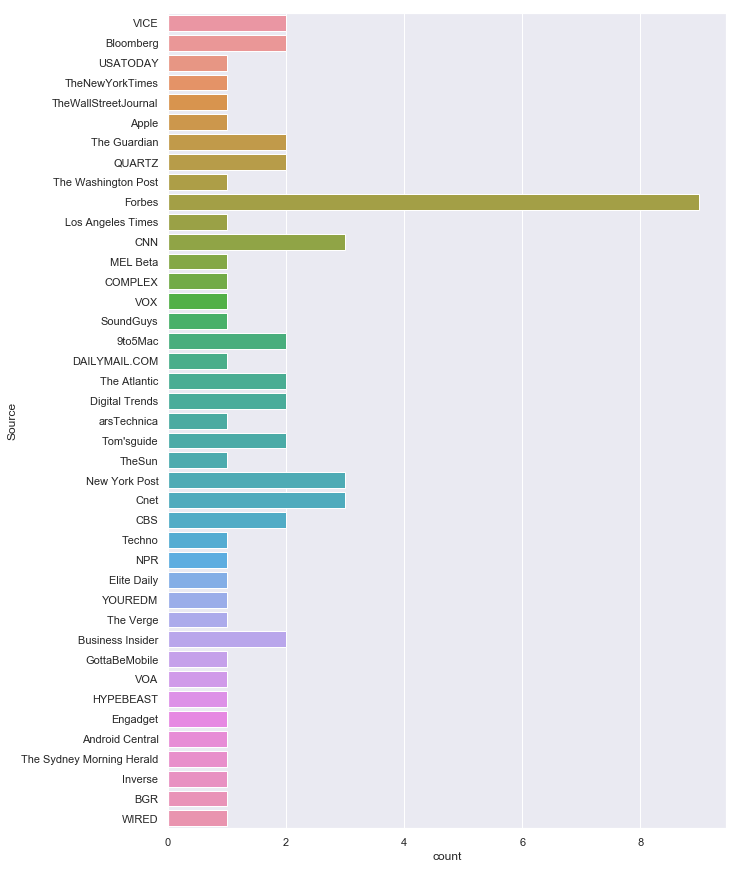

In [9]:
sns.set(font_scale=1, rc={"figure.figsize":(10,15)})
ax1 = sns.countplot(y="Source", data=raw)

In [10]:
import matplotlib.pyplot as plt

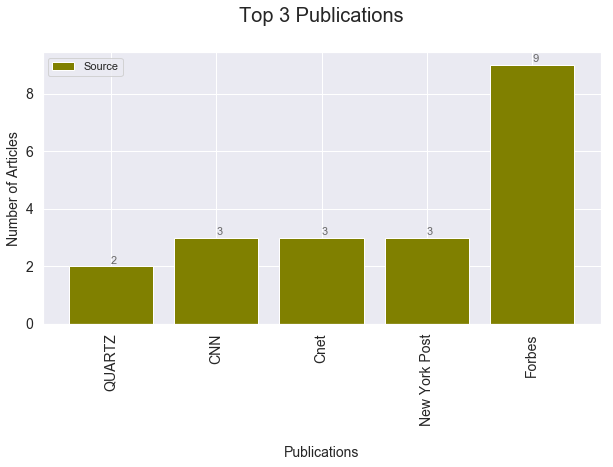

In [11]:
article_source5 = raw.Source.value_counts().sort_values(ascending = True).tail(5)
article_source5 = pd.DataFrame(article_source5)
ax2 = article_source5.plot(kind = 'bar',figsize = (10,5),width = 0.8,fontsize = 14,color = 'olive')
ax2.set_title('Top 3 Publications',fontsize = 20,pad = 30)
ax2.set_ylabel('Number of Articles',fontsize = 14)
ax2.xaxis.labelpad = 20
ax2.set_xlabel('Publications',fontsize = 14)
for i in ax2.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax2.text(i.get_x()+0.4, i.get_height()+0.1, \
            str(i.get_height()), fontsize=11, color='dimgrey')

From the above figure, in terms of airpords articles, we can find Forbes has more articles than other publications, releasing 9 in 2019.

Text(0.5, 1.0, 'Topics Frequency')

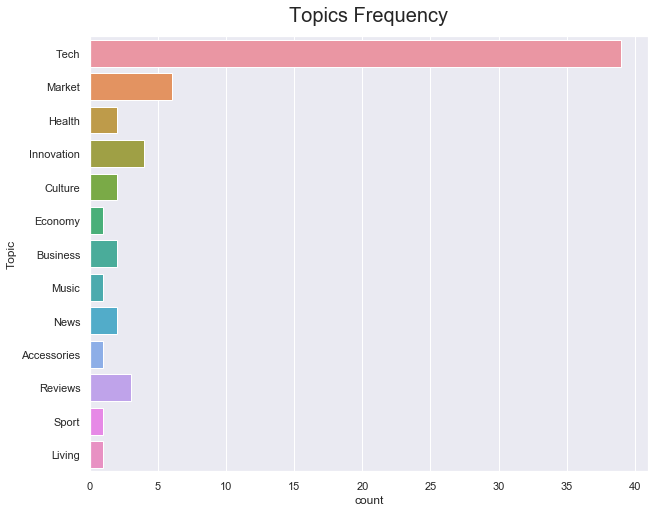

In [12]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(10,8)})
ax3 = sns.countplot(y="Topic", data=raw)
ax3.set_title('Topics Frequency',fontsize = 20,pad = 15)

Most articles involving airpods are assigned in tech section.

In [13]:
# packages
import nltk, urllib, requests, string, re
from nltk import word_tokenize
from nltk.corpus import stopwords
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/yanting/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
raw['word_count'] = raw['Content'].apply(lambda x: len(str(x).split(" ")))
raw[['Content','word_count']].head()

,Content,word_count
0,"In each article of this column, we'll focus on...",3014
1,Amazon.com Inc. revealed its rival to Apple In...,121
2,The latest model of AirPods—the ones that come...,61
3,"Apple’s new AirPods, those tiny wireless earbu...",615
4,Apple Inc.’s AirPods met with no small amount ...,73


In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties
import statistics
import math
import numpy as np

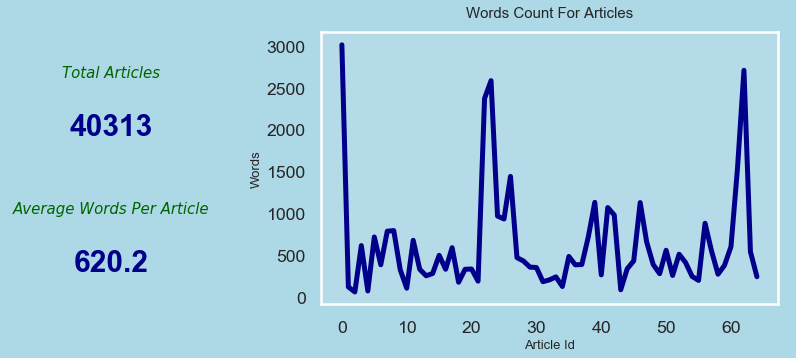

In [49]:
total_articles = sum(raw.word_count)
avg_words = statistics.mean(raw.word_count)

left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
font = FontProperties()
font.set_family('serif')
font.set_name('Arial Rounded MT')
font.set_style('italic')
plt.figure(figsize=(18,20),facecolor='lightblue')
grid = plt.GridSpec(3, 4, wspace=0.5, hspace=0.5)
ax = plt.subplot(grid[1:2,0])
ax.text(left+0.1, top+0.1, 'Total Articles',
        horizontalalignment='center',
        verticalalignment='center',fontproperties=font,
        fontsize=15, color='darkgreen', 
        transform=ax.transAxes)
ax.text(left+0.1, top-0.1,total_articles,
        horizontalalignment='center', 
        verticalalignment='center',
        fontsize=30, fontweight='bold', color='darkblue',
        transform=ax.transAxes)
ax.text(left+0.1, bottom+0.1, 'Average Words Per Article',
        horizontalalignment='center', 
        verticalalignment='center',fontproperties=font,
        fontsize=15, color='darkgreen',
        transform=ax.transAxes)
ax.text(left+0.1, bottom-0.1, avg_words,
        horizontalalignment='center', 
        verticalalignment='center',
        fontsize=30, fontweight='bold', color='darkblue',
        transform=ax.transAxes)
plt.axis('off')
fig=plt.subplot(grid[1:2,1:3])
plt.rcParams['axes.facecolor'] = 'white'
fig.patch.set_alpha(0.1)
plt.plot(raw.word_count,color = 'darkblue', linewidth=5)
plt.title("Words Count For Articles",pad = 15,fontsize = 15)
plt.xlabel("Article Id",fontsize=13)
plt.ylabel("Words",fontsize=13)
plt.grid(False)


In [17]:
def title_key_word(s):
    raw1 = BeautifulSoup(s, 'html.parser').get_text()
    raw1=raw1.lower()
    raw1=re.sub(r'\d+', '', raw1)
    tokens1 = word_tokenize(raw1)
    sw1 = stopwords.words('English')
    new_token_1=list()
    for t in tokens1:
        if t not in sw1:
            new_token_1.append(t)
    punc=list(string.punctuation)
    manualcheck= ['“','”','’',"n't","'m","th","'d","'s","eant",'priyanka','bangalore','std']
    punc.extend(manualcheck)
    new_token_2=list()
    for t in new_token_1:
        if t not in punc:
            new_token_2.append(t)
    tagged = nltk.pos_tag(new_token_2)
    t1=list()
    for com in tagged:
        if com[1]=='NN' or com[1]=='NNS' or com[1]=='NNP' or com[1]=='NNPS':
            t1.append(com[0])
    freq= nltk.FreqDist(t1)
    tryo = pd.DataFrame(list(dict(freq).items()))
    if tryo.empty:
        result=list()
    else:
        tryo=tryo.sort_values(by=1, ascending=False)
        tryo.columns = ['Words', 'freq']
        if len(list(tryo['Words']))<1:
            result=list(tryo['Words'])
        else:
            df=tryo[0:1]
            result=list(df['Words'])
    return(result)

In [18]:
titles = ''
for i in raw.Title:
    titles = titles + ' ' + i
print(titles)

 Airpods are Tragedy Amazon Pursues Apple’s AirPods With Echo Bud Wireless Headphones The latest Apple AirPods are finally on sale Apple AirPods Review: Perfect Earbuds, but They Don’t Last Music to Apple’s Ears AirPods, the world’s most popular wireless headphones, are getting even better How did Apple’s AirPods go from mockery to millennial status symbol? The truth behind claims Airpods cause cancer Apple finds wearable ‘gimmicks’ really count as iPhone slips Everyone’s AirPods will die. We’ve got the trick to replacing them. Apple Readies Camera-Focused Pro iPhones, New iPads, Larger MacBook Pro AirPods 3 May Launch In Days, Called AirPods Pro, With Cool New Features Apple’s AirPods With Wireless Charging Case Are Only $169 Apple Accidentally Leaks AirPods 3 With New Design, Maybe Noise Canceling Powerbeats Pro Earphones Are Now $50 Off By The Numbers: How Tariffs On Airpods & Apple Watch Impacts Apple's Profits Apple unveils new AirPods with extended talk time and wireless charging

In [19]:
min(raw.word_count)
min_count = 0
for i in raw.word_count:
    if i == min(raw.word_count):
        min_count += 1
print(min_count)
max(raw.word_count)
max_count = 0
for i in raw.word_count:
    if i == max(raw.word_count):
        max_count += 1
print(max_count)

1
1


In [20]:
print('                                        Article Report                               ')
print('    This is a report for {0}. There are {1} articles about {0},every article contains attitudes or reviews with various words.\n    Based on the data we have, articles about {0} have {2} words on average even though {3} article has {4} words and {5} article has {6} words. Overall, 75% articles has less than {7} words.'.format(title_key_word(titles)[0],total_articles, math.ceil(avg_words),min_count,min(raw.word_count),max_count,max(raw.word_count),math.ceil(np.percentile(raw.word_count,75))))

                                        Article Report                               
    This is a report for airpods. There are 40313 articles about airpods,every article contains attitudes or reviews with various words.
    Based on the data we have, articles about airpods have 621 words on average even though 1 article has 61 words and 1 article has 3014 words. Overall, 75% articles has less than 718 words.


In [38]:
def key_word(s):
    rawdata = BeautifulSoup(s, 'html.parser').get_text() 
    rawdata=rawdata.lower() 
    rawdata=re.sub(r'\d+', '', rawdata) 
    tokens = word_tokenize(rawdata) 
    list0 = stopwords.words('English')
    list1 = ['airpods—the','case—are']
    sw = list0
    sw.extend(list1)
    new_token=list()
    for t in tokens:
        if t not in sw:
            new_token.append(t)
    punc=list(string.punctuation) # list puntuations from string package
    punc.append('“')  # add other signs that do not contained in sting list
    punc.append('”')
    punc.append('’')
    punc.append('\'') 
    punc.append("n't")
    punc.append("'m")
    punc.append("th")
    punc.append("'d")
    punc.append("'ve")
    punc.append("'re")
    punc.append("'ll")
    punc.append("--")
    punc.append("-a")
    punc.append("'s")
    punc.append("\"")
    punc.append("re")
    punc.append("will")
    new_token2=list()
    for t in new_token:
        if t not in punc:
            new_token2.append(t) # this list contain key words
    tagged = nltk.pos_tag(new_token2)
    l = list()
    for x in tagged:
        if x[1] =='NN' or x[1] =='NNS':
            l.append(x[0])
    return l

In [39]:
term_count = {}
for i in raw.Content:
    words = key_word(i)
    for word in words:
        if word not in term_count:
            term_count[word] = 1
        else:
            term_count[word] = term_count[word] + 1
data = pd.DataFrame.from_dict(term_count, orient='index')
data = data.reset_index()
data.columns = ['Terms','Count']
terms =data.sort_values(by = ['Count'],ascending = False).head(20)
terms = terms[2:]
terms1=terms.sort_index()
terms1

,Terms,Count
10,product,59
61,company,55
63,music,59
65,phone,51
69,battery,67
80,headphones,160
86,people,104
90,pair,53
96,design,63
101,life,76


In [84]:
terms.iloc[2,1]

160

In [40]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [41]:
text = " ".join(content for content in raw.Content)
stopwords1 = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords1, background_color="white",colormap = 'viridis').generate(text)

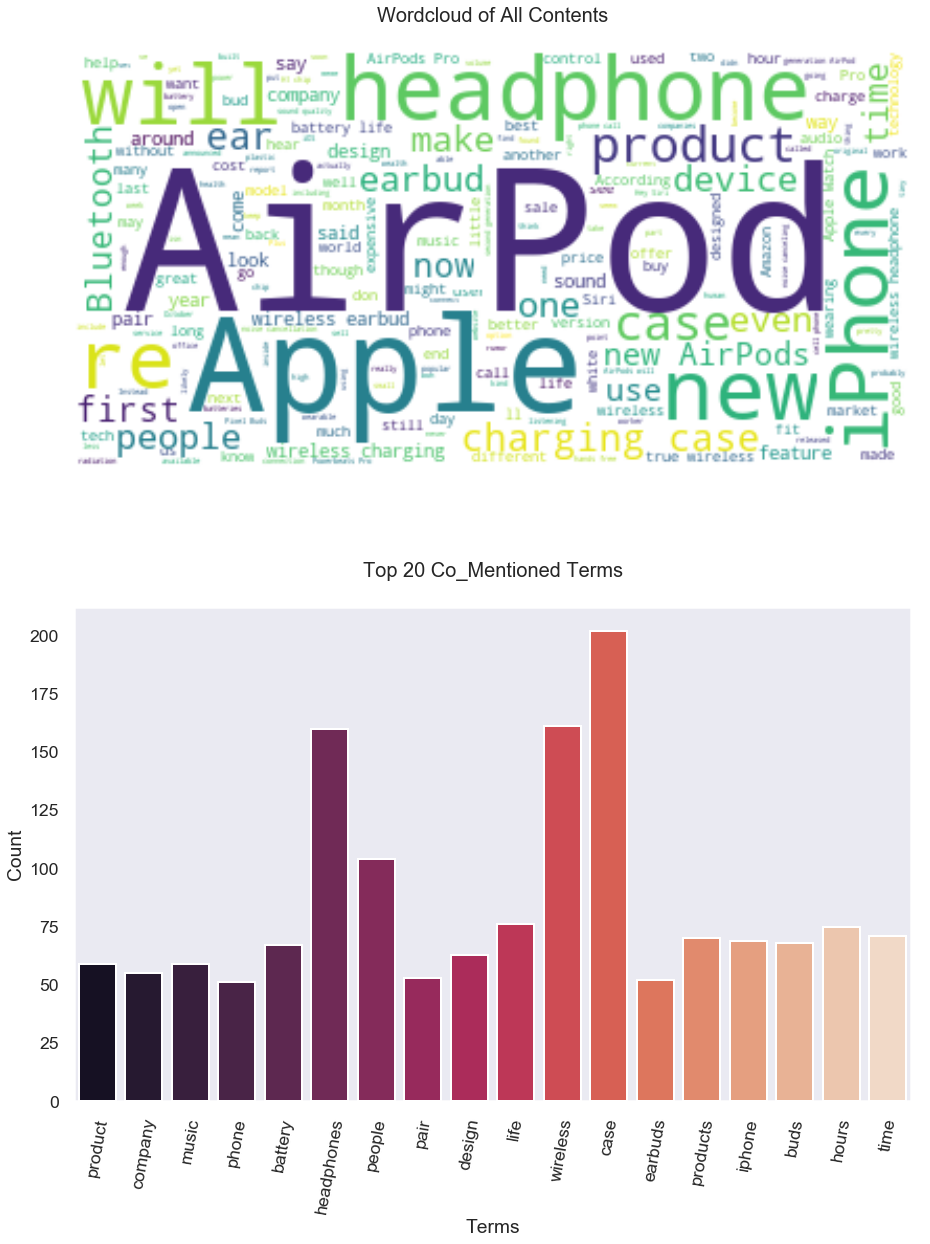

In [42]:
font = FontProperties()
font.set_family('serif')
font.set_name('Arial Rounded MT')
font.set_style('italic')
plt.figure(figsize=(15,20),facecolor='white')
ax = plt.subplot(2,1,1)
plt.title('Wordcloud of All Contents', fontsize = 20, pad=30)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
fig=plt.subplot(2,1,2)
sns.set(rc={'figure.figsize':(15,10)})
sns.set_context("poster", font_scale = 0.8, rc={"grid.linewidth": 1})
ax4 = sns.barplot(x="Terms", y="Count", data=terms1, palette="rocket")
for item in ax4.get_xticklabels():
    item.set_rotation(80)
ax4.set_title('Top 20 Co_Mentioned Terms',fontsize = 20,pad = 30)
plt.grid(False)


In [87]:
print('                                  Report about Co-mentioned Terms                          ')
print('    Advertorials with influential terms sound more likely to have a better result of market campaign.\n    By learning the {0} articles collected, we find several words are repetitive mentioned. The Wordcloud figure above gives some clues. Words in bigger size are mentioned more than the other words. Then, moving forward to the bar plot below, We find the top three co-mentioned terms are {1},{2},{3}. Especially, {1} was mentioned {4} times, {2} was mentioned {5} times and {3} was mentioned {6} times. '.format(len(raw),terms.iloc[0,0],terms.iloc[1,0],terms.iloc[2,0],terms.iloc[0,1],terms.iloc[1,1],terms.iloc[2,1]))

                                  Report about Co-mentioned Terms                          
    Advertorials with influential terms sound more likely to have a better result of market campaign.
    By learning the 65 articles collected, we find several words are repetitive mentioned. The Wordcloud figure above give some clues. Words in bigger size are mentioned more than the other words. Then, moving forward to the bar plot below, We find the top three co-mentioned terms are case,wireless,headphones. Especially, case was mentioned 202 times, wireless was mentioned 161 times and headphones was mentioned 160 times. 
